In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL


In [16]:
# Download Reliance Industries NSE data
ticker = "RELIANCE.NS"

df = yf.download(
    ticker,
    start="2020-01-01",
    end=None,
    progress=False
)

# Use Adjusted Close if available
df = df[['Close']].dropna()
df.head()


Price,Close
Ticker,RELIANCE.NS
Date,
2020-01-01,675.324219
2020-01-02,686.821289
2020-01-03,687.648865
2020-01-06,671.700745
2020-01-07,682.034546


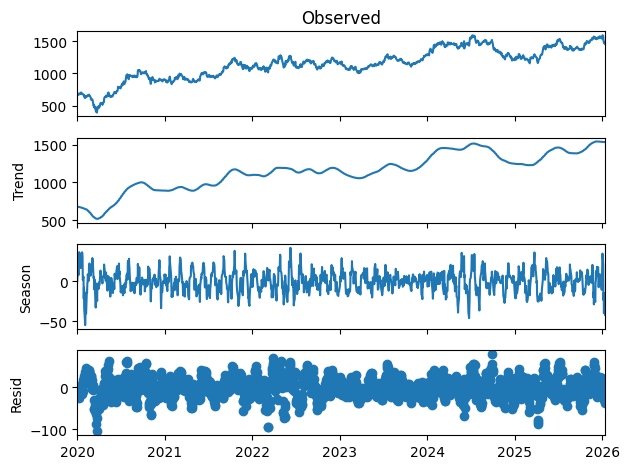

In [17]:
# STL Decomposition (Additive)
# Using period=30 as a default for daily data visualization
stl = STL(df['Close'], period=30)
res_add = stl.fit()
fig = res_add.plot()
plt.show()


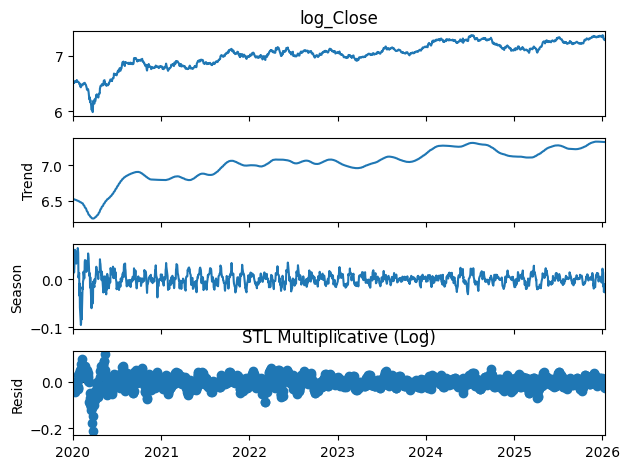

In [18]:
# STL Decomposition (Multiplicative)
# Applied via Log transformation
df['log_Close'] = np.log(df['Close'])
stl_mul = STL(df['log_Close'], period=30)
res_mul = stl_mul.fit()
fig = res_mul.plot()
plt.title('STL Multiplicative (Log)')
plt.show()


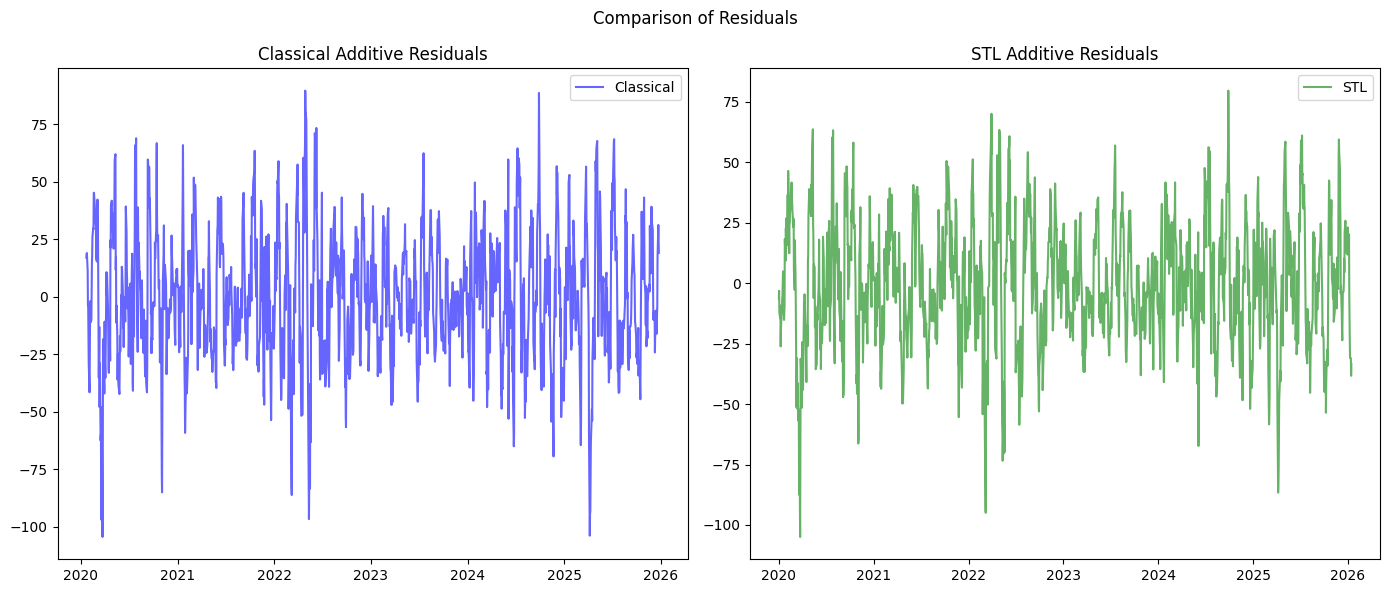

In [19]:
# Comparison: Classical vs STL
classical_res = seasonal_decompose(df['Close'], model='additive', period=30)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(classical_res.resid, label='Classical', color='blue', alpha=0.6)
plt.title('Classical Additive Residuals')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(res_add.resid, label='STL', color='green', alpha=0.6)
plt.title('STL Additive Residuals')
plt.legend()

plt.suptitle('Comparison of Residuals')
plt.tight_layout()
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller, kpss

def check_stationarity(series):
    # Augmented Dickey-Fuller Test
    print("Results of Dickey-Fuller Test:")
    adf_test = adfuller(series, autolag='AIC')
    adf_results = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_results[f'Critical Value ({key})'] = value
    print(adf_results)

    print("\nResults of KPSS Test:")
    kpss_test = kpss(series, regression='c', nlags="auto")
    kpss_results = pd.Series(kpss_test[0:3], index=['Test Statistic', 'p-value', 'Lags Used'])
    for key, value in kpss_test[3].items():
        kpss_results[f'Critical Value ({key})'] = value
    print(kpss_results)

# Usage:
check_stationarity(df['Close'])


Results of Dickey-Fuller Test:
Test Statistic                   -1.807761
p-value                           0.376615
#Lags Used                        0.000000
Number of Observations Used    1498.000000
Critical Value (1%)              -3.434723
Critical Value (5%)              -2.863471
Critical Value (10%)             -2.567798
dtype: float64

Results of KPSS Test:
Test Statistic            4.673083
p-value                   0.010000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/tmp/ipykernel_25570/2898337156.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(series, regression='c', nlags="auto")
